In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor


In [ ]:
df=pd.read_csv("/content/Salary Data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [ ]:
df.head(5)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [ ]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [ ]:
df[df["Age"].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dropna(inplace=True)
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [ ]:
df.duplicated().sum()

49

In [ ]:
df[df.duplicated()].head(15)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)


In [ ]:
df.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
mean_of_age=df["Age"].mean()
median_of_age=df["Age"].median()


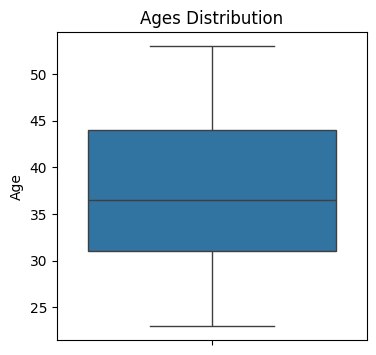

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,4))
sns.boxplot(y=df["Age"])
plt.title("Ages Distribution")

plt.ylabel("Age")
plt.show()


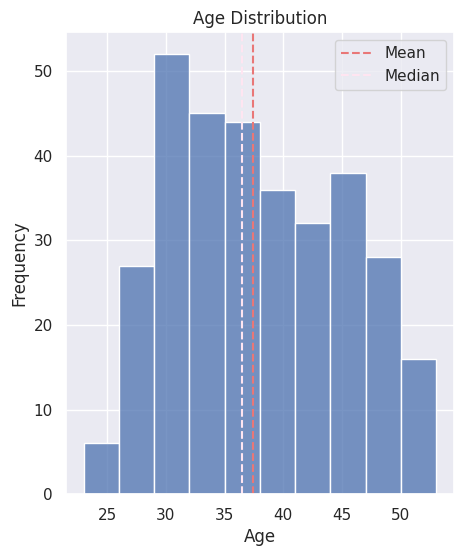

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(5, 6))
sns.histplot(df["Age"])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.axvline(x=mean_of_age, color="#E97777", linestyle='--', label='Mean')
plt.axvline(x=median_of_age, color="#FFF0", linestyle='--', label='Median')

plt.legend()
plt.show()


Moderate right skewness

In [ ]:
gender=df["Gender"].value_counts(normalize=1)*100
gender.apply(lambda x: f"{x:0.2f}%")


Gender
Male      52.47%
Female    47.53%
Name: proportion, dtype: object

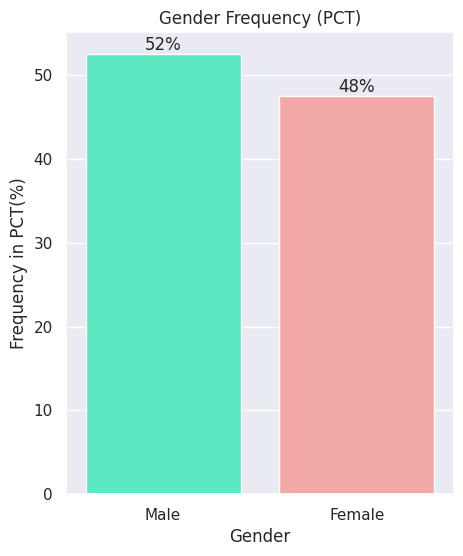

In [ ]:
plt.figure(figsize=(5, 6))
sns.barplot(x=gender.index, y=gender.values,hue=gender.index,  palette=["#45FFCA", "#FF9B9B"])
for index, value in enumerate(gender.values):
    plt.text(index, value + 0.5, f"{value:.0f}%", ha='center', fontsize=12)
plt.title("Gender Frequency (PCT)")
plt.xlabel("Gender")
plt.ylabel("Frequency in PCT(%)")
plt.show()


In [ ]:
education = df["Education Level"].value_counts(normalize=1) * 100
education.apply(lambda x: f"{x:0.2f}%")


Education Level
Bachelor's    58.95%
Master's      28.09%
PhD           12.96%
Name: proportion, dtype: object

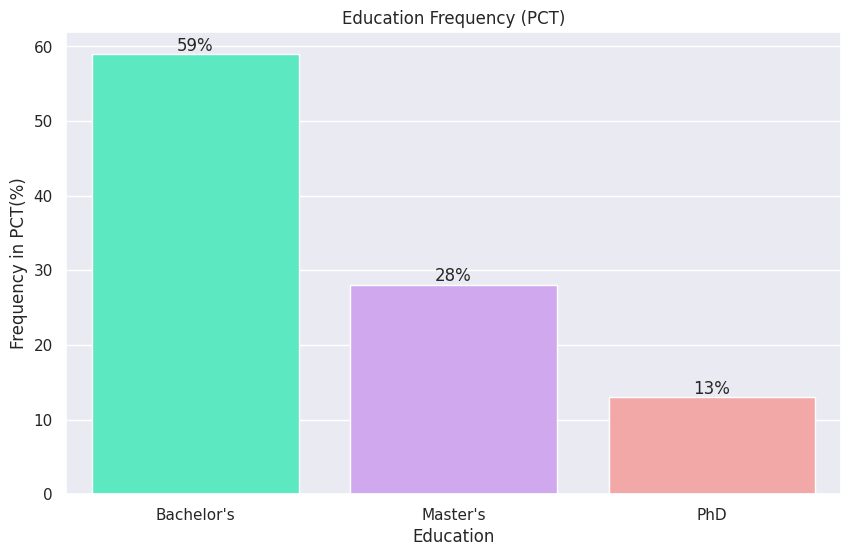

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=education.index, y=education.values,hue=education.index, palette=["#45FFCA", "#D09CFA", "#FF9B9B"])
for index, value in enumerate(education.values):
    plt.text(index, value + 0.5, f"{value:.0f}%", ha='center', fontsize=12)
plt.title("Education Frequency (PCT)")
plt.xlabel("Education")
plt.ylabel("Frequency in PCT(%)")
plt.show()


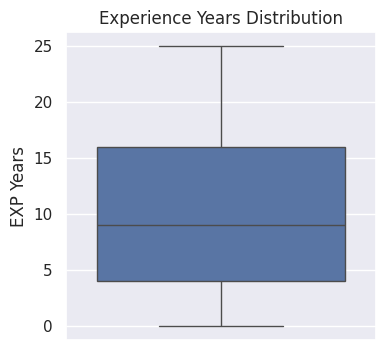

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(y=df["Years of Experience"])
plt.title("Experience Years Distribution")

plt.ylabel("EXP Years")
plt.show()

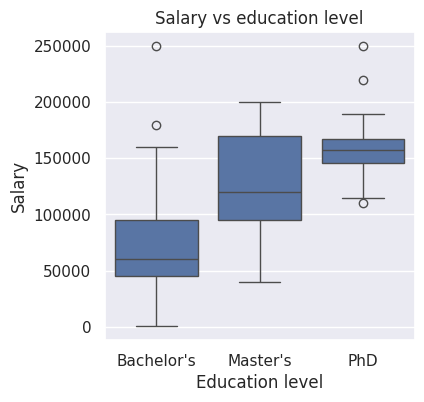

In [ ]:
plt.figure(figsize=(4,4))
plt.title("Salary vs education level")
plt.xlabel("Education level")
plt.ylabel("Salary")
sns.boxplot(y = df["Salary"],x = df["Education Level"])
plt.show()

In [ ]:
salary_by_education = df.groupby("Education Level")["Salary"].mean().sort_values(ascending=False)
salary_by_education.apply(lambda x: f"${x:,.2f}")


Education Level
PhD           $158,095.24
Master's      $127,912.09
Bachelor's     $73,902.36
Name: Salary, dtype: object

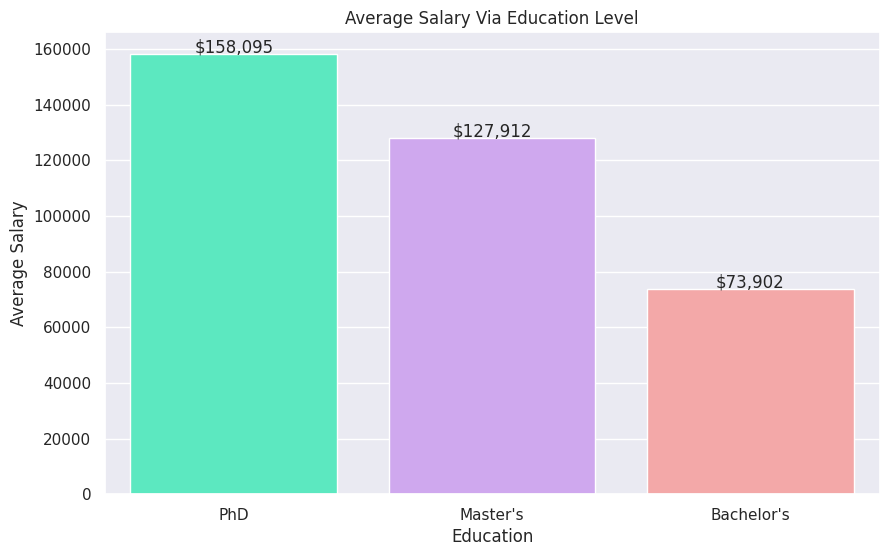

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=salary_by_education.index, y=salary_by_education.values,hue=salary_by_education.index, palette=["#45FFCA", "#D09CFA", "#FF9B9B"])
for index, value in enumerate(salary_by_education.values):
    plt.text(index, value + 500, f"${value:,.0f}", ha='center', fontsize=12)
plt.title("Average Salary Via Education Level")
plt.xlabel("Education")
plt.ylabel("Average Salary")
plt.show()


In [ ]:
def groupping_exp(exp):
    if exp >= 0 and exp <= 5:
        return "0-5 years"
    elif exp > 5 and exp <= 10:
        return "6-10 years"
    elif exp > 10 and exp <= 15:
        return "11-15 years"
    elif exp > 15 and exp <= 20:
        return "16-20 years"
    else:
        return "20+"

In [ ]:
salary_by_exp = df.groupby(df["Years of Experience"].apply(groupping_exp))["Salary"].mean().sort_values(ascending=False)
salary_by_exp.apply(lambda x: f"${x:,.2f}")


Years of Experience
20+            $175,400.00
16-20 years    $158,684.21
11-15 years    $115,178.57
6-10 years      $92,215.19
0-5 years       $48,881.78
Name: Salary, dtype: object

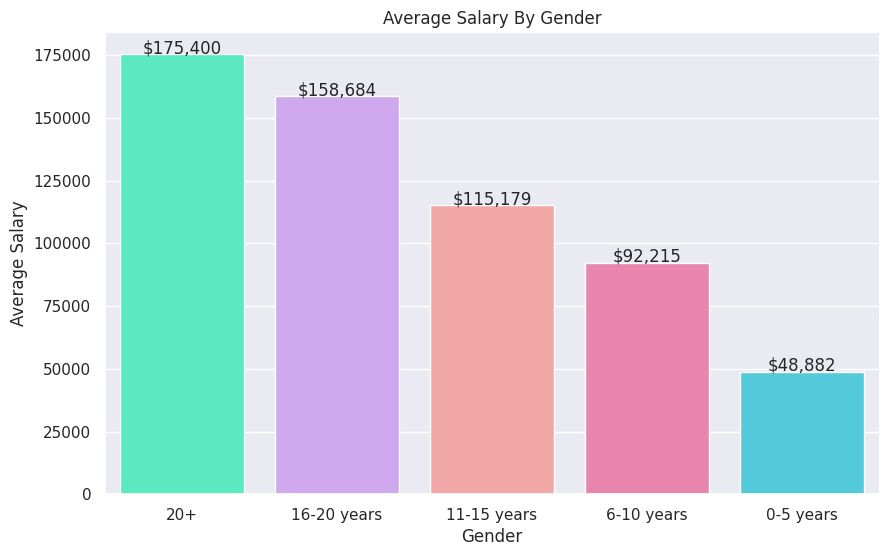

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=salary_by_exp.index, y=salary_by_exp.values,hue=salary_by_exp.index, palette=["#45FFCA", "#D09CFA", "#FF9B9B", "#F875AA", "#3EDBF0"])
for index, value in enumerate(salary_by_exp.values):
    plt.text(index, value + 500, f"${value:,.0f}", ha='center', fontsize=12)
plt.title("Average Salary By Gender")
plt.xlabel("Gender")
plt.ylabel("Average Salary")
plt.show()


We can notice that the Education Level and Experience Years have a huge influence on the salary!!



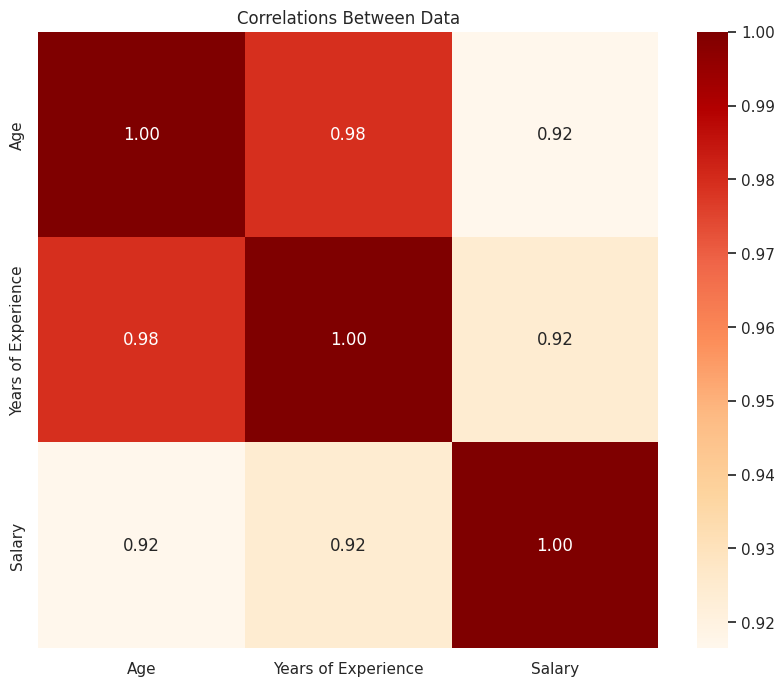

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="OrRd")
plt.title("Correlations Between Data")
plt.show()


<Figure size 1200x1000 with 0 Axes>

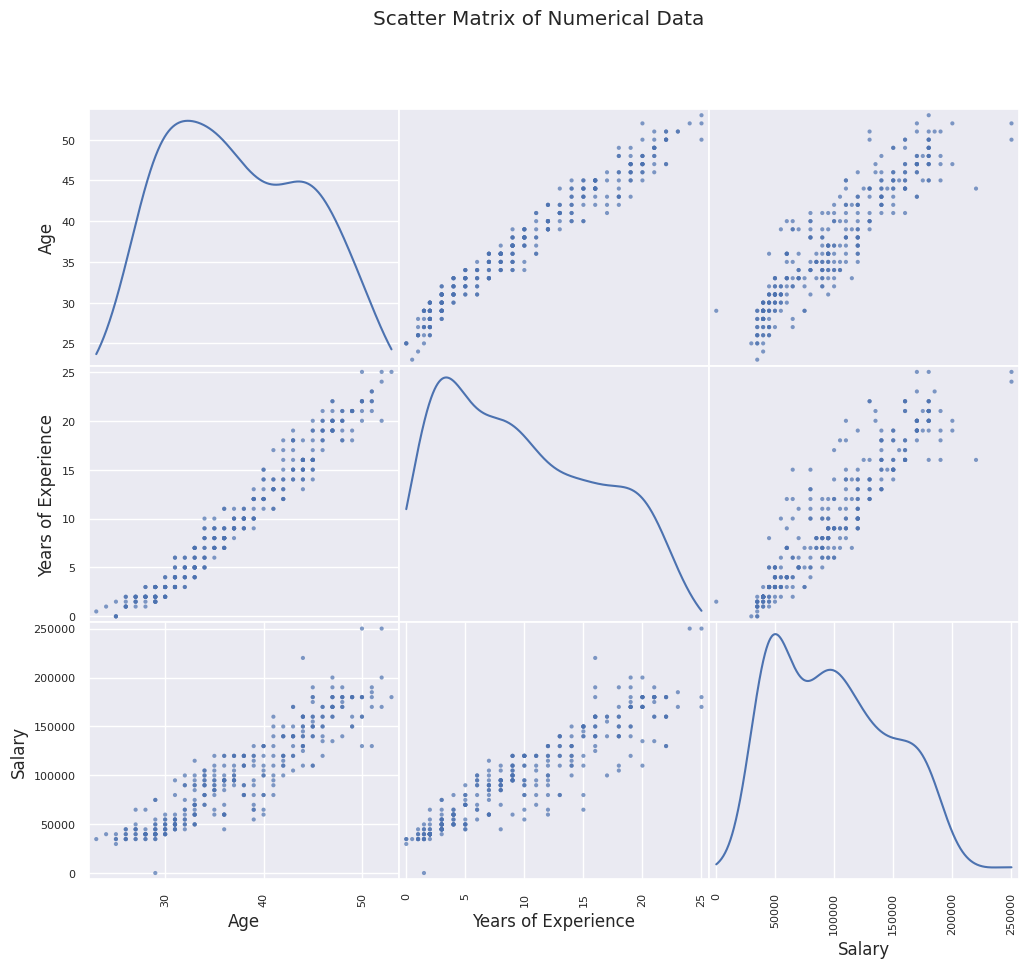

In [ ]:

from pandas.plotting import scatter_matrix


numeric_df = df.select_dtypes(include='number')


plt.figure(figsize=(12, 10))


scatter_matrix(numeric_df, alpha=0.7, figsize=(12, 10), diagonal='kde')

plt.suptitle("Scatter Matrix of Numerical Data")
plt.show()


There is a Strong Linear Positive Correlation between Salary and Age

There is a Strong Linear Positive Correlation between Salary and Experience Year

Converting Categorical Into Numerical



In [ ]:
df_encoded = pd.get_dummies(df, columns=["Education Level"], drop_first=True) *1
df_encoded.head()


,Age,Gender,Job Title,Years of Experience,Salary,Education Level_Master's,Education Level_PhD
0,32.0,Male,Software Engineer,5.0,90000.0,0,0
1,28.0,Female,Data Analyst,3.0,65000.0,1,0
2,45.0,Male,Senior Manager,15.0,150000.0,0,1
3,36.0,Female,Sales Associate,7.0,60000.0,0,0
4,52.0,Male,Director,20.0,200000.0,1,0


Selecting Our Features



In [ ]:
X = df_encoded.drop(columns=["Job Title", "Salary", "Gender"])
y = df_encoded["Salary"]

In [ ]:
X.head()


,Age,Years of Experience,Education Level_Master's,Education Level_PhD
0,32.0,5.0,0,0
1,28.0,3.0,1,0
2,45.0,15.0,0,1
3,36.0,7.0,0,0
4,52.0,20.0,1,0


Splitting Our Data



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)


Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
mse_linear_reg = mean_squared_error(y_test, linear_reg_predictions)
r2_linear_reg = r2_score(y_test, linear_reg_predictions)
error_ratio_linear_reg = mse_linear_reg / (y_test.std() ** 2)

print("Linear Regression - Mean Squared Error:", mse_linear_reg)
print("Linear Regression - R-squared:", r2_linear_reg)
print("Linear Regression - Error Ratio:", error_ratio_linear_reg)


Linear Regression - Mean Squared Error: 149691677.08396062
Linear Regression - R-squared: 0.9417456272717888
Linear Regression - Error Ratio: 0.0573581516093156


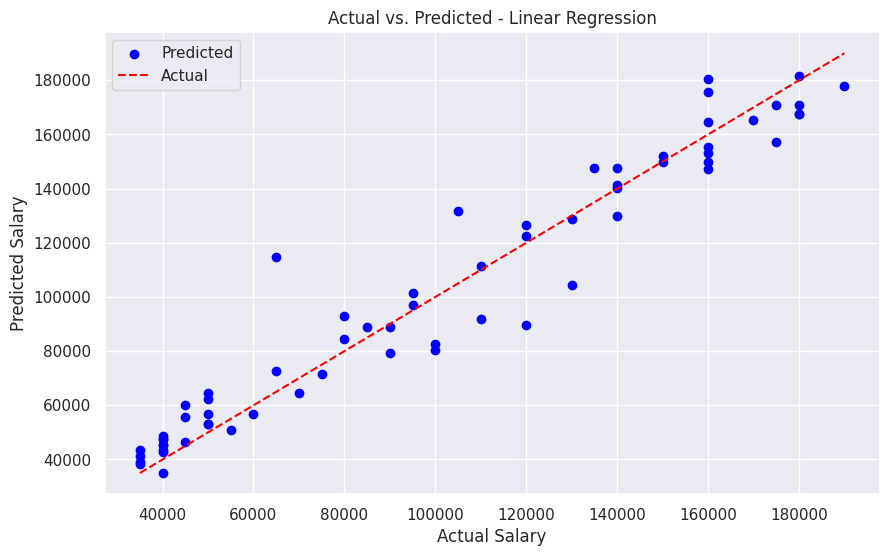

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_reg_predictions, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted - Linear Regression')
plt.legend()
plt.show()


In [ ]:
d_linear = {
    "Actual_Salary": y_test,
    "Predicted_Salary_Linear": linear_reg_predictions,
    "Error_Linear": linear_reg_predictions - y_test
}
predicted_df_linear = pd.DataFrame(d_linear)
predicted_df_linear.head()


,Actual_Salary,Predicted_Salary_Linear,Error_Linear
224,160000.0,164589.957305,4589.957305
279,140000.0,140333.462819,333.462819
130,160000.0,175619.773067,15619.773067
186,100000.0,80506.300111,-19493.699889
149,175000.0,157305.793442,-17694.206558


Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=6)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_reg = LinearRegression()


poly_reg.fit(X_poly_train, y_train)


poly_reg_predictions = poly_reg.predict(X_poly_test)


r2_poly_reg = poly_reg.score(X_poly_test, y_test)

mse_poly_reg = mean_squared_error(y_test, poly_reg_predictions)


error_ratio_poly_reg = mse_poly_reg / (y_test.std() ** 2)

print("Polynomial Regression - R-squared:", r2_poly_reg)
print("Polynomial Regression - Mean Squared Error:", mse_poly_reg)
print("Polynomial Regression - Error Ratio:", error_ratio_poly_reg)



Polynomial Regression - R-squared: 0.25895609444061096
Polynomial Regression - Mean Squared Error: 1904202205.276057
Polynomial Regression - Error Ratio: 0.7296432300892446


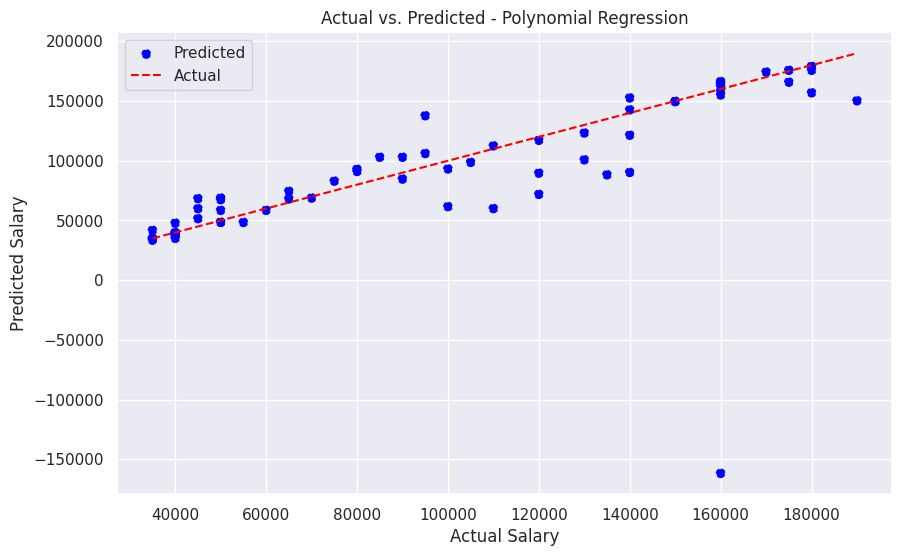

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, poly_reg_predictions, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted - Polynomial Regression')
plt.legend()
plt.show()


In [ ]:

d_poly = {
    "Actual_Salary": y_test,
    "Predicted_Salary_Polynomial": poly_reg_predictions,
    "Error_Polynomial": poly_reg_predictions - y_test
}
predicted_df_poly = pd.DataFrame(d_poly)
predicted_df_poly.head()


,Actual_Salary,Predicted_Salary_Polynomial,Error_Polynomial
224,160000.0,162176.808614,2176.808614
279,140000.0,90329.731173,-49670.268827
130,160000.0,166425.726778,6425.726778
186,100000.0,61707.162813,-38292.837187
149,175000.0,165872.562471,-9127.437529


Randomn Forest Regressor

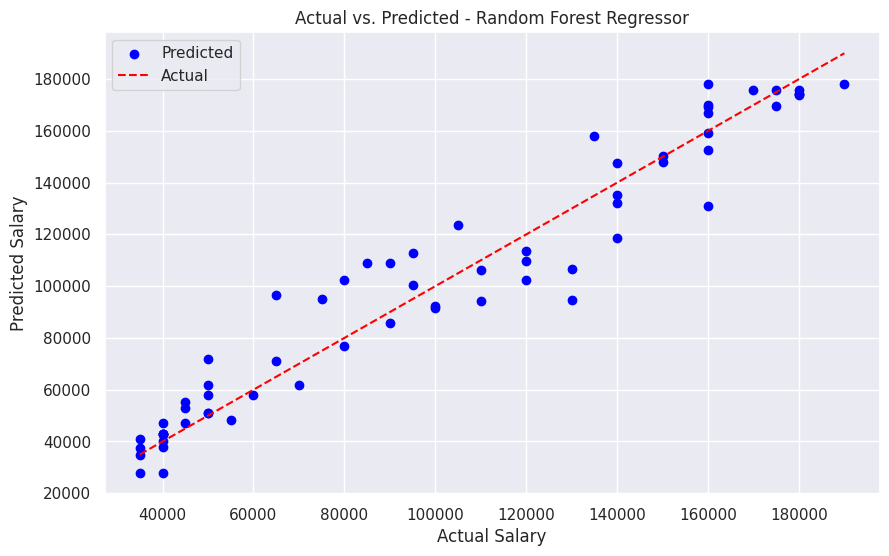

Random Forest Regressor Model Score: 94.11%
Random Forest Regressor MSE: 161107521.60604793
Random Forest Regressor R^2: 0.9373030097879592
Random Forest Regressor Error Ratio: 0.061732421131855536


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


rf_regressor = RandomForestRegressor()


rf_regressor.fit(X_train, y_train)


rf_predictions = rf_regressor.predict(X_test)


score_rf = rf_regressor.score(X_train, y_train) * 100

mse_rf = mean_squared_error(y_test, rf_predictions)
r2_rf = r2_score(y_test, rf_predictions)
error_ratio_rf = mse_rf / (y_test.std() ** 2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted - Random Forest Regressor')
plt.legend()
plt.show()

print(f"Random Forest Regressor Model Score: {np.round(score_rf, 2)}%")
print(f"Random Forest Regressor MSE: {mse_rf}")
print(f"Random Forest Regressor R^2: {r2_rf}")
print(f"Random Forest Regressor Error Ratio: {error_ratio_rf}")



In [ ]:
predicted_salary = np.round(rf_regressor.predict(X_test))
d = {
    "Actual_Salary" : y_test,
    "Predicted_Salary" : predicted_salary,
    "error": predicted_salary - y_test
}
predected_df = pd.DataFrame(d)
predected_df.head()


,Actual_Salary,Predicted_Salary,error
224,160000.0,152500.0,-7500.0
279,140000.0,135392.0,-4608.0
130,160000.0,178300.0,18300.0
186,100000.0,92488.0,-7512.0
149,175000.0,169500.0,-5500.0


Model Scores

In [ ]:

score_linear_reg = linear_reg.score(X_train, y_train) * 10
print(f"Linear Regression Model Score: {np.round(score_linear_reg, 2)}%")


Linear Regression Model Score: 87.34%


In [ ]:

score_poly_reg = poly_reg.score(X_poly_train, y_train) * 100
print(f"Polynomial Regression Model Score: {np.round(score_poly_reg, 2)}%")


Polynomial Regression Model Score: 91.95%


In [ ]:

score_rf = rf_regressor.score(X_test, y_test) * 100
print(f"Random Forest Regressor Model Score: {np.round(score_rf, 2)}%")


Random Forest Regressor Model Score: 93.73%


**Model Scores**:

Linear Regression: 87.34%

Polynomial Regression: 91.95%

Random Forest Regressor: 93.73%

Random Forest Regressor: 94.11%

The higher the score, the better the model performs. Therefore, the Random Forest Regressor models outperform both Linear and Polynomial Regression models in terms of predictive accuracy.


**Mean Squared Error (MSE):**

Random Forest Regressor: 161,107,521.61

Polynomial Regression: 1,904,202,205.28

Linear Regression: 149,691,677.08

MSE measures the average squared difference between the actual and predicted values. Lower MSE indicates better predictive performance. Thus, the Random Forest Regressor model has the lowest MSE, suggesting it provides the most accurate predictions.


**R-squared (R^2):**

Random Forest Regressor: 0.937

Polynomial Regression: 0.259

Linear Regression: 0.942

R-squared represents the proportion of variance in the dependent variable that is predictable from the independent variables. A higher R-squared value indicates a better fit of the model to the data. Here, the Random Forest Regressor and Linear Regression models have high R-squared values, indicating a good fit to the data.


**Error Ratio:**

Random Forest Regressor: 0.062

Polynomial Regression: 0.730

Linear Regression: 0.057

Error ratio provides a measure of the error relative to the variance of the target variable. Lower values indicate better predictive performance. Here, the Random Forest Regressor and Linear Regression models have lower error ratios compared to Polynomial Regression.


**Conclusion:**

The Random Forest Regressor model demonstrates superior predictive accuracy compared to both Linear and Polynomial Regression models, as evidenced by higher model scores, lower MSE, and higher R-squared values.

Among the three models, the Linear Regression model performs slightly better than the Polynomial Regression model, as it has lower MSE and error ratio.

Overall, the Random Forest Regressor model is the most suitable for predicting the target variable, followed by Linear Regression, with Polynomial Regression being the least effective.





